In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/Phase_Retrieval/classification_over_measurements/utils")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from LoadData import get_datos
from FinalModel import CLASSIFICATION_MODEL,CLASSIFICATION_MODEL_with_back,CLASSIFICATION_MODEL_with_initialization
from FinalModel import ejemplo_backpropagation, ejemplo_inicializacion
import tensorflow as tf
import matplotlib.pyplot as plt
from CallBacks import callback_test_clasification
import numpy as np
import seaborn as sns
#$from loss_and_metrics import F1_score

In [4]:
#@title Parámetros
SHAPE = (128,128)
BATCH_SIZE = 8
NUM_MEASUREMENTS = 1
NUM_CLASSES = 10

dataset = "fashion_mnist" # mnist - fashion_mnist - cifar10
initialization = "FSI" # None - backpropagation - FSI

In [5]:
results_folder = os.path.join("..", "results", dataset,initialization)

In [6]:
print(results_folder)

../results/fashion_mnist/FSI


In [ ]:
train_images, test_images = get_datos(name_dataset = dataset, batch_size=BATCH_SIZE, tam = SHAPE, num_clases=NUM_CLASSES)

In [ ]:
if initialization == "None":
  modelo = CLASSIFICATION_MODEL(shape=SHAPE, num_clases=NUM_CLASSES, L = NUM_MEASUREMENTS, snr=100)
elif initialization == "backpropagation":
  modelo = CLASSIFICATION_MODEL_with_back(shape=SHAPE, num_clases=NUM_CLASSES, L = NUM_MEASUREMENTS, snr=100)
elif initialization == "FSI":
  modelo = CLASSIFICATION_MODEL_with_initialization(shape=SHAPE, num_clases=NUM_CLASSES, L = NUM_MEASUREMENTS, snr=100)
else: 
  raise Exception("INICIALIZACIÓN INCORRECTA: " + initialization)

modelo.build((BATCH_SIZE, *SHAPE, 2))

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [ ]:
modelo.load_weights(os.path.join(results_folder, "last_weights.h5"))

In [ ]:
a = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=( *SHAPE, 1), weights=None)

In [ ]:
a.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   288         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
pred_labels = np.array([])
real_labels = np.array([])
for image, label in test_images:
  label_pred = tf.argmax(modelo.predict(image),axis=1).numpy()
  label = tf.argmax(label,axis=1).numpy()
  pred_labels = np.concatenate((label_pred,pred_labels),axis=0)
  real_labels = np.concatenate((label,real_labels),axis=0)

In [ ]:
cf_matrix = tf.math.confusion_matrix(real_labels, pred_labels, num_classes=10)
cf_matrix = cf_matrix/np.sum(cf_matrix, axis=1)[:, np.newaxis]
plt.figure(figsize=(12,9))
sns.set(font_scale=1.2)
sns.heatmap(cf_matrix, annot=True, cmap='Pastel1_r',xticklabels=False, yticklabels=False, vmin=-0, vmax = 1, fmt='.3g')
plt.savefig(os.path.join(results_folder, "confusion_matrix.svg"))
np.save(os.path.join(results_folder, "confusion_matrix"), cf_matrix.numpy())

In [ ]:
results_folder

'../results/fashion_mnist/FSI'

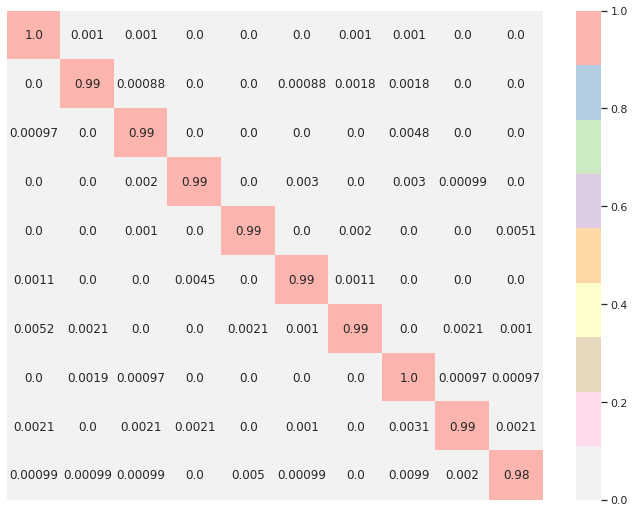

In [27]:
results_folder = os.path.join("..", "results", "mnist","FSI")
cf_matrix = np.load(os.path.join(results_folder, "confusion_matrix.npy"))

#cf_matrix = tf.math.confusion_matrix(real_labels, pred_labels, num_classes=10)
cf_matrix = cf_matrix/np.sum(cf_matrix, axis=1)[:, np.newaxis]
plt.figure(figsize=(12,9))
sns.set(font_scale=1)
sns.heatmap(cf_matrix, annot=True, cmap='Pastel1_r',xticklabels=False, yticklabels=False, vmin=-0, vmax = 1, fmt='.2')
plt.savefig(os.path.join(results_folder, "confusion_matrix.svg"))
